# Part1: labo class 5 :Categorisation- logistic regression
We  use the  dataset that you cleaned in the first labo: 'hotel_bookings_cleaned.csv'. The data has not been standardized yet and some features have been removed to downsize the dataset. The only reason behind this was to reduce the computation time during the labo. Otherwise, some algorithms would have to run for hours. This is the reality of machine learning. Never do this for a real project!  The hotel owner asked you to predict which reservations will be cancelled.

# 0. Loading packages and dataset

In [74]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('hotel_bookings_cleaned.csv')

# 1. Take a look at the data
1. Look at the dimensions (number of features and observations)
2. Look at the first 5 rows
3. Look at the different features and there data types
4. Take a look at the distribution of the outcome 'is_canceled'

1. Dimensions

In [75]:
df.shape

(10000, 52)

2. first rows

In [76]:
df.head(10)

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,...,assigned_room_type_D,assigned_room_type_Other,deposit_type_Deposit,deposit_type_No Deposit,company_40.0,company_Other,company_Undefined,customer_type_Other,customer_type_Transient,customer_type_Transient-Party
0,0,0.000000,2016,50,8,0.000000,0.693147,2,0.000000,0.0,...,1,0,0,1,0,0,1,0,1,0
1,1,5.899897,2015,42,16,0.000000,1.098612,2,0.000000,0.0,...,0,0,1,0,0,0,1,0,0,1
2,1,2.890372,2016,11,8,0.000000,1.386294,2,0.000000,0.0,...,0,0,0,1,0,0,1,0,1,0
3,0,4.948760,2015,47,18,0.000000,1.386294,1,0.000000,0.0,...,1,0,0,1,0,0,1,0,0,1
4,1,5.505332,2017,19,7,1.098612,1.098612,2,0.000000,0.0,...,0,0,0,1,0,0,1,0,1,0
5,0,4.234107,2015,40,29,0.000000,1.098612,2,0.000000,0.0,...,0,0,0,1,0,0,1,0,0,1
6,0,4.983607,2016,34,15,0.693147,1.098612,0,1.098612,0.0,...,0,1,0,1,0,0,1,0,1,0
7,0,4.304065,2015,48,27,0.693147,1.098612,2,0.000000,0.0,...,0,0,0,1,0,0,1,1,0,0
8,1,5.389072,2016,24,9,0.000000,1.098612,2,0.000000,0.0,...,0,0,1,0,0,0,1,0,1,0
9,1,2.079442,2016,11,11,1.098612,1.609438,1,0.000000,0.0,...,0,0,0,1,0,0,1,0,1,0


3. data types

In [77]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 52 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   is_canceled                     10000 non-null  int64  
 1   lead_time                       10000 non-null  float64
 2   arrival_date_year               10000 non-null  int64  
 3   arrival_date_week_number        10000 non-null  int64  
 4   arrival_date_day_of_month       10000 non-null  int64  
 5   stays_in_weekend_nights         10000 non-null  float64
 6   stays_in_week_nights            10000 non-null  float64
 7   adults                          10000 non-null  int64  
 8   children                        10000 non-null  float64
 9   babies                          10000 non-null  float64
 10  is_repeated_guest               10000 non-null  int64  
 11  previous_cancellations          10000 non-null  float64
 12  previous_bookings_not_canceled  1

4. Distribution of the outcome

In [78]:
df['is_canceled'].value_counts()

is_canceled
0    5857
1    4143
Name: count, dtype: int64

# 2 Train/val/test-split and standardisation

1. Make a Train/val/test - Use random state=1234 whenever needed
    + Why do we do a three-way split instead of just a train/test-split?
2. Standardize all three datasets  
    + Make sure you only standardise the numerical features
    + Which dataset do you use to train the standardScaler?
    + Also standardise the complete train+validation set. Why could you need this?


1. Splitting the data

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


X = df.drop(columns='is_canceled')
y = df['is_canceled']

X_trainval, X_test, y_trainval, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)
X_train, X_val, y_train, y_val = train_test_split(X_trainval,y_trainval, test_size=0.2, random_state=1234)


2. Standardize

In [80]:
num_feat = df.columns[1:20]
scaler = StandardScaler()
X_train_stand = X_train.copy()
X_trainval_stand = X_trainval.copy()
X_val_stand = X_val.copy()
X_test_stand = X_test.copy()

X_train_stand[num_feat] = scaler.fit_transform(X_train_stand[num_feat])
X_val_stand[num_feat] = scaler.transform(X_val_stand[num_feat])
X_trainval_stand[num_feat] = scaler.transform(X_trainval_stand[num_feat])
X_test_stand[num_feat] = scaler.transform(X_test_stand[num_feat])

# 3. Logistic regression
 ## 3.1 Basic model
1. Train a logistic regression classifier, choose C=10 000 as starting value.
2. Test the trained model on the train and the test set.
    + Would you say this model is overfitted, underfitted or neither?
3. Evaluate the model, using
    + confusion matrix (don't forget to predict the outcome for the test data first)
    + accuracy
    + classification report
    + Roc-curve
    

1. Train a logistic model

In [81]:

from sklearn.linear_model import LogisticRegression

# Fit the model
logreg = LogisticRegression(C=10000, max_iter=200)
logreg.fit(X_train_stand, y_train)



LogisticRegression(C=10000, max_iter=200)

2. Test both the train and test dataset

In [82]:
# then do the calibration (cv='prefit')
print(logreg.score(X_train_stand, y_train))
print(logreg.score(X_val_stand, y_val))

0.80015625
0.8


3. Evaluate the model

In [83]:
# predict the outcomes for the test dataset
y_val_pred = logreg.predict(X_val_stand)
y_val_pred_prob = logreg.predict_proba(X_val_stand)

In [84]:
# construct the confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_val, y_val_pred)
print(confusion_matrix)

[[840  87]
 [233 440]]


In [85]:
# print the classification report
from sklearn.metrics import classification_report
print(classification_report(y_val, y_val_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       927
           1       0.83      0.65      0.73       673

    accuracy                           0.80      1600
   macro avg       0.81      0.78      0.79      1600
weighted avg       0.80      0.80      0.80      1600



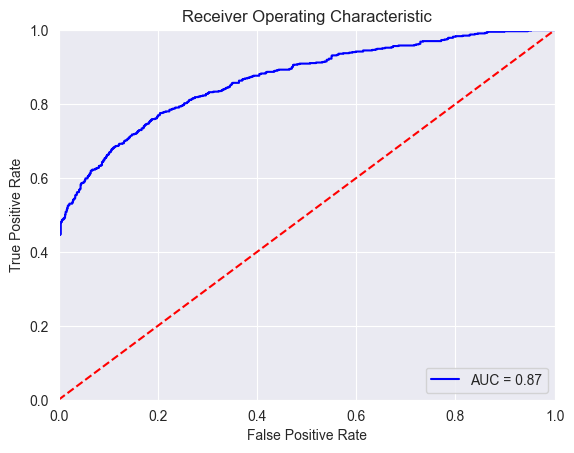

In [86]:
# print the ROC-curve
import sklearn.metrics as metrics
preds = y_val_pred_prob[:,1]
fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
roc_auc = metrics.auc(fpr, tpr)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### 3.2. Calibration
1. Check if the model is well calibrated, using the validation set
2. Do an isotonic calibration (even if the original model is already calibrated well).
3. Re-evaluate the model: Did the calibration have a large effect on the performance of the model? Can you explain why (not)?
4. No redo the entire thing: fit and calibrate the model at the same time, using CalibratedClassifierCV (use CV=3). Be careful to use the right dataset! 
5. Also evaluate this model.
    + Print the classification report
    + Draw a ROC-curve, but also include the ROC-curve of the plain logistic model


 1. Check the calibration

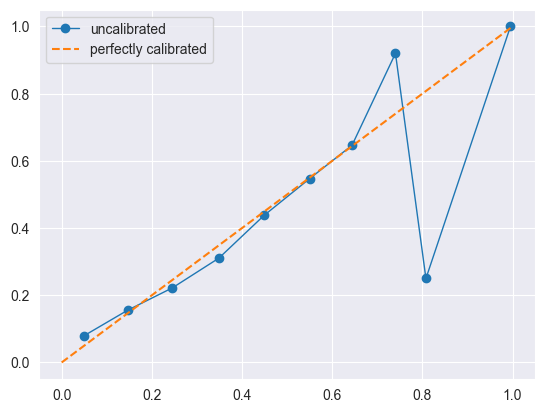

In [87]:
from sklearn.calibration import calibration_curve
y_pred_val_prob = logreg.predict_proba(X_val_stand)

fop, mpv = calibration_curve(y_val,y_pred_val_prob[:,1],n_bins=10)

plt.plot(mpv,fop, marker='o', linewidth=1, label='uncalibrated')
plt.plot([0,1],[0,1],linestyle='--', label='perfectly calibrated')
plt.legend()

2. Calibrate model

C:\Users\teode\IdeaProjects\AppliedArtificialIntelligence\venv\lib\site-packages\sklearn\calibration.py:333: UserWarning: The `cv='prefit'` option is deprecated in 1.6 and will be removed in 1.8. You can use CalibratedClassifierCV(FrozenEstimator(estimator)) instead.
  warnings.warn(


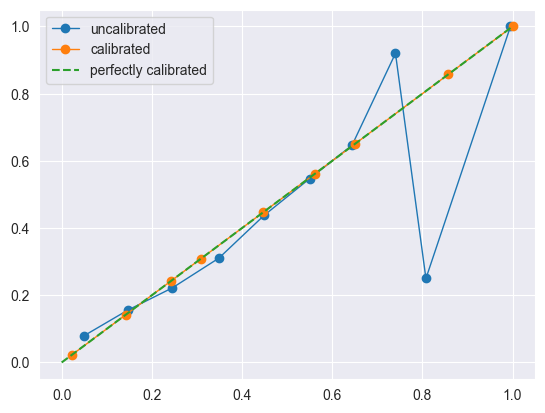

In [88]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
isotonic = CalibratedClassifierCV(logreg, cv='prefit', method='isotonic')
isotonic.fit(X_val_stand, y_val)

y_val_pred_prob_c = isotonic.predict_proba(X_val_stand)
fop, mpv = calibration_curve(y_val,y_pred_val_prob[:,1],n_bins=10)
fop_c, mpv_c = calibration_curve(y_val,y_val_pred_prob_c[:,1],n_bins=10)
plt.plot(mpv,fop, marker='o', linewidth=1, label='uncalibrated')
plt.plot(mpv_c,fop_c, marker='o', linewidth=1, label='calibrated')
plt.plot([0,1],[0,1],linestyle='--', label='perfectly calibrated')
plt.legend()
plt.show()

3. Construct the classification report for the calibrated model

In [89]:
y_pred = logreg.predict(X_val_stand)
y_pred_c = isotonic.predict(X_val_stand)

print(classification_report(y_val, y_pred))
print(classification_report(y_val, y_pred_c))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       927
           1       0.83      0.65      0.73       673

    accuracy                           0.80      1600
   macro avg       0.81      0.78      0.79      1600
weighted avg       0.80      0.80      0.80      1600

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       927
           1       0.87      0.62      0.73       673

    accuracy                           0.80      1600
   macro avg       0.82      0.78      0.79      1600
weighted avg       0.82      0.80      0.80      1600



4. Fit and calibrate the model at the same time.

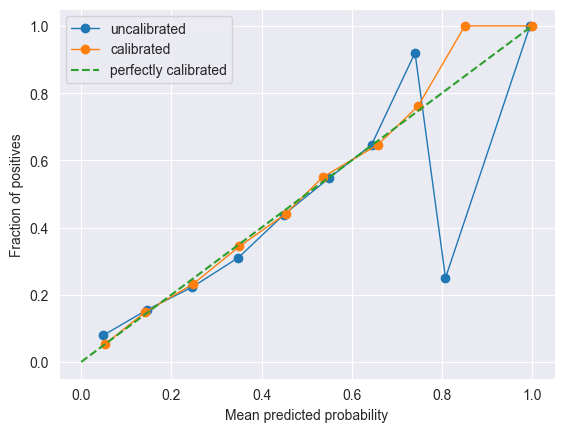

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       927
           1       0.87      0.62      0.73       673

    accuracy                           0.80      1600
   macro avg       0.82      0.78      0.79      1600
weighted avg       0.82      0.80      0.80      1600

              precision    recall  f1-score   support

           0       0.78      0.90      0.84       927
           1       0.83      0.66      0.74       673

    accuracy                           0.80      1600
   macro avg       0.81      0.78      0.79      1600
weighted avg       0.80      0.80      0.80      1600



In [90]:
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
logreg2 = LogisticRegression(C=10000, max_iter=1000)
isotonic2 = CalibratedClassifierCV(logreg2, cv=3, method='isotonic')
isotonic2.fit(X_train_stand, y_train)


# The calibration plot
y_val_pred_prob_c2 = isotonic2.predict_proba(X_val_stand)

fop, mpv = calibration_curve(y_val,y_pred_val_prob[:,1],n_bins=10)
fop_c, mpv_c = calibration_curve(y_val,y_val_pred_prob_c2[:,1],n_bins=10)

plt.plot(mpv,fop, marker='o', linewidth=1, label='uncalibrated')
plt.plot(mpv_c,fop_c, marker='o', linewidth=1, label='calibrated')
plt.plot([0,1],[0,1],linestyle='--', label='perfectly calibrated')

plt.xlabel('Mean predicted probability')
plt.ylabel('Fraction of positives')

plt.legend()
plt.show()

y_pred_c2 = isotonic2.predict(X_val_stand)
print(classification_report(y_val, y_pred_c))
print(classification_report(y_val, y_pred_c2))

5. Evaluate

In [91]:
print('the calbiration seems very good if you look at the plot, but the class 1 scores are lower, so its chance to predict the high priced houses islower')

the calbiration seems very good if you look at the plot, but the class 1 scores are lower, so its chance to predict the high priced houses islower


### 3.3 Adding polynomials and penalisation
1. Design  some polynomial features, with degree 1 (This does not make any sense, because it will just return the original dataset, but using degree 2 makes the computation time way to high to be able to do it during class. This way, you at least get to practice the code).
2. Perform a RandomizedSearch on the logistic regression
    + let parameter C deviate from 0.0001 to 10, with 1000 options
    + Use cv=3 and random_state=1234
    + Ask the Randomized search to fit 100 models
3. Find out which value of C gives the best model
4. Make a scatterplot of the accuracy vs the values of C
5. Do a grid search, but also do a calibration at the same time.
    + Fit 50 models
    + Base the range of C you will include in the grid search on the scatterplot from question 4
6. Evaluate the final model
    + Look at the classification report
    + Draw the ROC-curve (and include the previous ROC-curves)
    + Does it perform better than the plain logistic model?

1. Design the polynomial features 

In [92]:
#Designing polynomial features
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=1)
X_train_poly = poly.fit_transform(X_train_stand)
X_val_poly = poly.fit_transform(X_val_stand)
X_test_poly = poly.transform(X_test_stand)

2. Do the RandomizedSearch

In [93]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

C = [round(x,5) for x in np.linspace(start = 0.0001, stop = 10, num = 1000)]
random_grid = {'C': C}
# The object to fit the model
logreg = LogisticRegression( max_iter=1000)

# object for the randomised search
log_random = RandomizedSearchCV(estimator = logreg, param_distributions = random_grid, n_iter = 100,
                                cv = 3, verbose=2,  n_jobs=-1, random_state=1234)

#Fitting model (model+ calibration)
log_random.fit(X_train_poly, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=LogisticRegression(max_iter=1000),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'C': [np.float64(0.0001),
                                              np.float64(0.01011),
                                              np.float64(0.02012),
                                              np.float64(0.03013),
                                              np.float64(0.04014),
                                              np.float64(0.05015),
                                              np.float64(0.06016),
                                              np.float64(0.07017),
                                              np.float64(0.08018),
                                              np.float64(0.09019),
                                              np.float64(0.1002),
                                              np.float64(0.1102...
                                              np.float64(0.14024),
                                              np.float64(0.15025),
                                              np.float64(0.16026),
                                              np.float64(0.17027),
                                              np.float64(0.18028),
                                              np.float64(0.19029),
                                              np.float64(0.2003),
                                              np.float64(0.21031),
                                              np.float64(0.22032),
                                              np.float64(0.23033),
                                              np.float64(0.24034),
                                              np.float64(0.25035),
                                              np.float64(0.26036),
                                              np.float64(0.27037),
                                              np.float64(0.28038),
                                              np.float64(0.29039), ...]},
                   random_state=1234, verbose=2)

3. Look at the parameters of the best model 

In [94]:
log_random.best_params_

{'C': np.float64(0.21031)}

4. Make a scatterplot of the accuracy vs the C-parameter

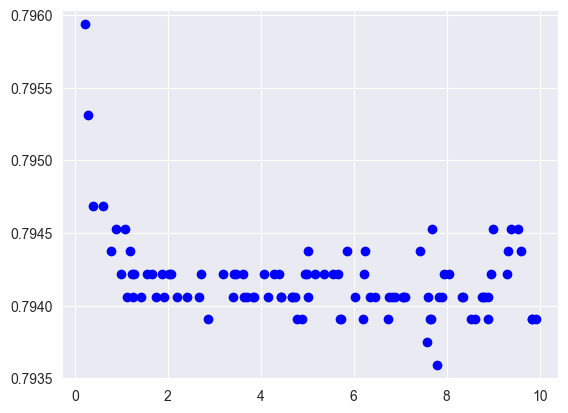

In [95]:
out2 = pd.DataFrame(log_random.cv_results_)
plt.ylim(out2['mean_test_score'].min()-0.0001, out2['mean_test_score'].max()+0.0001)
plt.scatter(out2['param_C'], out2['mean_test_score'], c='blue');


5. Grid search

In [96]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import make_scorer

prec_scorer = make_scorer(metrics.accuracy_score)
# other possibilities are metrics.recall_score, metrics.average_precision, ...

C = [x for x in np.linspace(start = 0.0001, stop = 1, num = 50)]

random_grid = {'C': C}

# The object to fit the model
logreg_balanced = LogisticRegression( max_iter=1000)

# object for the randomised search
log_grid = GridSearchCV(estimator = logreg_balanced, param_grid = random_grid,
                        scoring=prec_scorer  , cv = 3, verbose=2,  n_jobs=-1)
isotonic_log = CalibratedClassifierCV(log_grid, cv=3, method='isotonic')

#Fitting model (model+ calibration)
isotonic_log.fit(X_train_poly, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits
Fitting 3 folds for each of 50 candidates, totalling 150 fits


CalibratedClassifierCV(cv=3,
                       estimator=GridSearchCV(cv=3,
                                              estimator=LogisticRegression(max_iter=1000),
                                              n_jobs=-1,
                                              param_grid={'C': [np.float64(0.0001),
                                                                np.float64(0.02050612244897959),
                                                                np.float64(0.04091224489795919),
                                                                np.float64(0.06131836734693878),
                                                                np.float64(0.08172448979591837),
                                                                np.float64(0.10213061224489796),
                                                                np.float64(0.12253673469387756),
                                                                np.float64(0...
                                                                np.float64(0.4286285714285714),
                                                                np.float64(0.449034693877551),
                                                                np.float64(0.4694408163265306),
                                                                np.float64(0.4898469387755102),
                                                                np.float64(0.5102530612244898),
                                                                np.float64(0.5306591836734694),
                                                                np.float64(0.551065306122449),
                                                                np.float64(0.5714714285714285),
                                                                np.float64(0.5918775510204082), ...]},
                                              scoring=make_scorer(accuracy_score, response_method='predict'),
                                              verbose=2),
                       method='isotonic')

6. Evaluation

In [99]:
isotonic_log.score(X_val_poly, y_val)

0.801875

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       927
           1       0.83      0.66      0.74       673

    accuracy                           0.80      1600
   macro avg       0.81      0.78      0.79      1600
weighted avg       0.81      0.80      0.80      1600



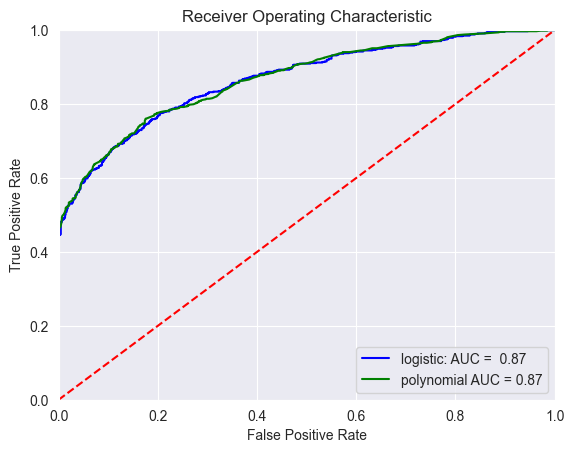

In [100]:
y_pred_poly = isotonic_log.predict(X_val_poly)
print(classification_report(y_val, y_pred_poly))
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds = y_val_pred_prob[:,1]
preds_poly = isotonic_log.predict_proba(X_val_poly)[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
fpr_p, tpr_p, threshold = metrics.roc_curve(y_val, preds_poly)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_p = metrics.auc(fpr_p, tpr_p)

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'logistic: AUC =  %0.2f' % roc_auc)
plt.plot(fpr_p, tpr_p, 'g', label = 'polynomial AUC = %0.2f' % roc_auc_p)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# Part 2: Labo second class : Classification: knn - gbm - svm

# 1. knn
1. Perform a grid search, with the number of neighbours ranging from 1 to 30.
2. Evaluate the best model
3. The data is slightly unbalanced. Do hybrid sampling
    + To oversample, use smote, with sampling_strategy=0.8
    + To undersample, use RandomUnderSampler,  with sampling_strategy=1

4. Redo the grid search, on the balanced data, but also calibrate the model at the same time. You can determine the range of values you include in the grid search based on the results of the first grid search.
5. Evaluate this model
    + Look at the classification report
    + Draw the ROC-curve 

1. Perform knn

Fitting 3 folds for each of 29 candidates, totalling 87 fits


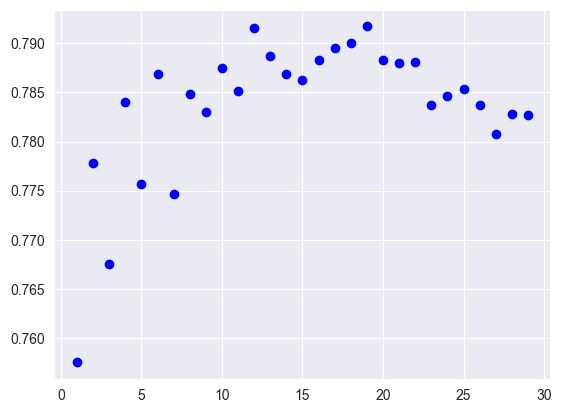

In [103]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
n_neighbors = np.arange(1,30)
param_grid = {'n_neighbors': n_neighbors}
knn = KNeighborsClassifier( )
grid_search = GridSearchCV(estimator = knn, param_grid = param_grid, scoring=prec_scorer ,cv = 3,  verbose=2, n_jobs = -1)
grid_search.fit(X_train_stand, y_train)
grid_search.best_params_

out2 = pd.DataFrame(grid_search.cv_results_)
xlabel_names = ['n_neighbors']
plt.scatter(out2['param_n_neighbors'], out2['mean_test_score'], c='blue');


2. Evaluate

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       927
           1       0.82      0.69      0.75       673

    accuracy                           0.81      1600
   macro avg       0.81      0.79      0.80      1600
weighted avg       0.81      0.81      0.80      1600



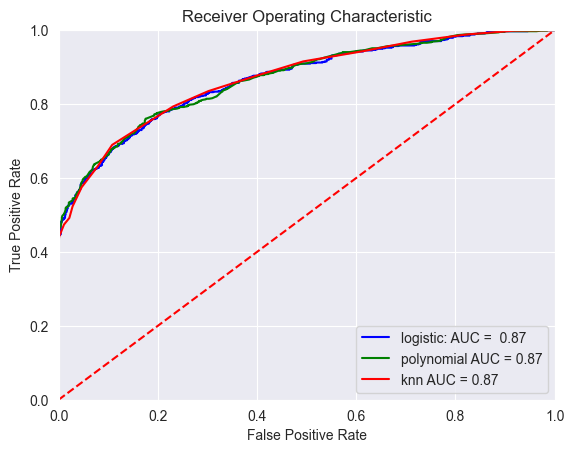

In [105]:
y_pred_knn = grid_search.predict(X_val_stand)
print(classification_report(y_val, y_pred_knn))

preds = y_val_pred_prob[:,1]
preds_poly = isotonic_log.predict_proba(X_val_poly)[:,1]
preds_knn = grid_search.predict_proba(X_val_stand)[:,1]


fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
fpr_p, tpr_p, threshold = metrics.roc_curve(y_val, preds_poly)
fpr_k, tpr_k, threshold = metrics.roc_curve(y_val, preds_knn)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_p = metrics.auc(fpr_p, tpr_p)
roc_auc_k = metrics.auc(fpr_k, tpr_k)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'logistic: AUC =  %0.2f' % roc_auc)
plt.plot(fpr_p, tpr_p, 'g', label = 'polynomial AUC = %0.2f' % roc_auc_p)
plt.plot(fpr_k, tpr_k, 'r', label = 'knn AUC = %0.2f' % roc_auc_k)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

3. Deal with the unbalance

In [106]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE(sampling_strategy=0.8, random_state=1703)
under = RandomUnderSampler(sampling_strategy=1)
pipeline = Pipeline([('o', over), ('u', under)])

X_train_smote, y_train_smote = pipeline.fit_resample(X_train_stand.copy(), y_train.copy())
X_val_smote, y_val_smote = pipeline.fit_resample(X_trainval_stand.copy(), y_trainval.copy())
np.bincount(y_val_smote)

C:\Users\teode\IdeaProjects\AppliedArtificialIntelligence\venv\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\teode\IdeaProjects\AppliedArtificialIntelligence\venv\lib\site-packages\sklearn\base.py:484: FutureWarning: `BaseEstimator._check_n_features` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_n_features` instead.
  warnings.warn(
C:\Users\teode\IdeaProjects\AppliedArtificialIntelligence\venv\lib\site-packages\sklearn\base.py:493: FutureWarning: `BaseEstimator._check_feature_names` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation._check_feature_names` instead.
  warnings.warn(
C:\Users\teode\IdeaProjects\AppliedArtificialIntelligence\venv\lib\site-packages\sklearn\base.py:474

array([3726, 3726])

4. Redo the grid search, but on the balanced data and calibrate the model

In [107]:
n_neighbors = np.arange(1,50)
param_grid = {'n_neighbors': n_neighbors}

knn_b = KNeighborsClassifier( )
grid_search_knn = GridSearchCV(estimator = knn, param_grid = param_grid, scoring=prec_scorer ,cv = 5,  verbose=2, n_jobs = -1)
isotonic_knn = CalibratedClassifierCV(grid_search_knn, cv=3, method='isotonic')


isotonic_knn.fit(X_train_smote, y_train_smote)

Fitting 5 folds for each of 49 candidates, totalling 245 fits
Fitting 5 folds for each of 49 candidates, totalling 245 fits
Fitting 5 folds for each of 49 candidates, totalling 245 fits


CalibratedClassifierCV(cv=3,
                       estimator=GridSearchCV(cv=5,
                                              estimator=KNeighborsClassifier(),
                                              n_jobs=-1,
                                              param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])},
                                              scoring=make_scorer(accuracy_score, response_method='predict'),
                                              verbose=2),
                       method='isotonic')

5. Re-evaluate

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       927
           1       0.80      0.70      0.74       673

    accuracy                           0.80      1600
   macro avg       0.80      0.78      0.79      1600
weighted avg       0.80      0.80      0.80      1600



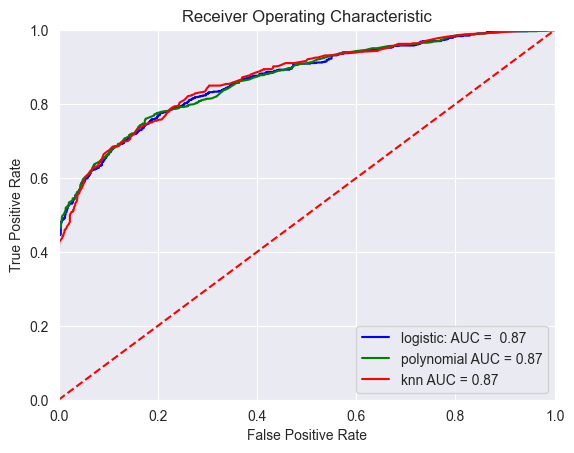

In [109]:
y_pred_knn_b = isotonic_knn.predict(X_val_stand)
print(classification_report(y_val, y_pred_knn_b))

preds_knn_b = isotonic_knn.predict_proba(X_val_stand)[:,1]

fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
fpr_p, tpr_p, threshold = metrics.roc_curve(y_val, preds_poly)
fpr_k, tpr_k, threshold = metrics.roc_curve(y_val, preds_knn_b)


roc_auc = metrics.auc(fpr, tpr)
roc_auc_p = metrics.auc(fpr_p, tpr_p)
roc_auc_k = metrics.auc(fpr_k, tpr_k)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'logistic: AUC =  %0.2f' % roc_auc)
plt.plot(fpr_p, tpr_p, 'g', label = 'polynomial AUC = %0.2f' % roc_auc_p)
plt.plot(fpr_k, tpr_k, 'r', label = 'knn AUC = %0.2f' % roc_auc_k)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 2. GBM
1. Perform a Randomized search. Use the following parameters
    + n_etimators: 50 values between 100 and 250
    + max_features: 'auto', 'sqrt', 'log2'
    + max_depth: 10 values between 1 and 10
    + min_samples_split: 9 values between 2 and 10
    + min_samples_leaf: 10 values between 1 and 10
    + learning_rate: 50 values between 0.001 and 1.5
    +  Use 3 folds and do 50 fits.
    + Use the balanced dataset
2. Evaluate the best model
3. Look at the scatterplots for the parameters
4. Do a grid search. Use the scatterplots to determine the parameters. Also perform the calibration at the same time.
5. Evaluate the best model model
    + Look at the classification report
    + Draw the ROC-curve (and include the previous ROC-curves)

1. Randomized search

In [111]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start = 100, stop = 250, num = 50)]
max_depth = [int(x) for x in np.linspace(1, 10, num = 10)]
min_samples_split = [int(x) for x in np.linspace(2, 10, num = 9)]
min_samples_leaf = [int(x) for x in np.linspace(1, 10, num = 10)]
learning_rate = [round(x,5) for x in np.linspace(start = 0.001, stop = 1.5, num = 50)]

random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
gbm = GradientBoostingClassifier()
gbm_random = RandomizedSearchCV(estimator = gbm, param_distributions = random_grid, n_iter = 50, cv = 3, verbose=2, random_state=4872, n_jobs = -1)
gbm_random.fit(X_train_smote, y_train_smote)
gbm_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits


{'n_estimators': 197,
 'min_samples_split': 8,
 'min_samples_leaf': 3,
 'max_depth': 6,
 'learning_rate': np.float64(0.12337)}

2. Evaluate

In [117]:
y_pred_gbm = gbm_random.predict(X_val_stand)
print(classification_report(y_val, y_pred_gbm))


              precision    recall  f1-score   support

           0       0.84      0.84      0.84       927
           1       0.78      0.78      0.78       673

    accuracy                           0.81      1600
   macro avg       0.81      0.81      0.81      1600
weighted avg       0.81      0.81      0.81      1600



3. scatterplot

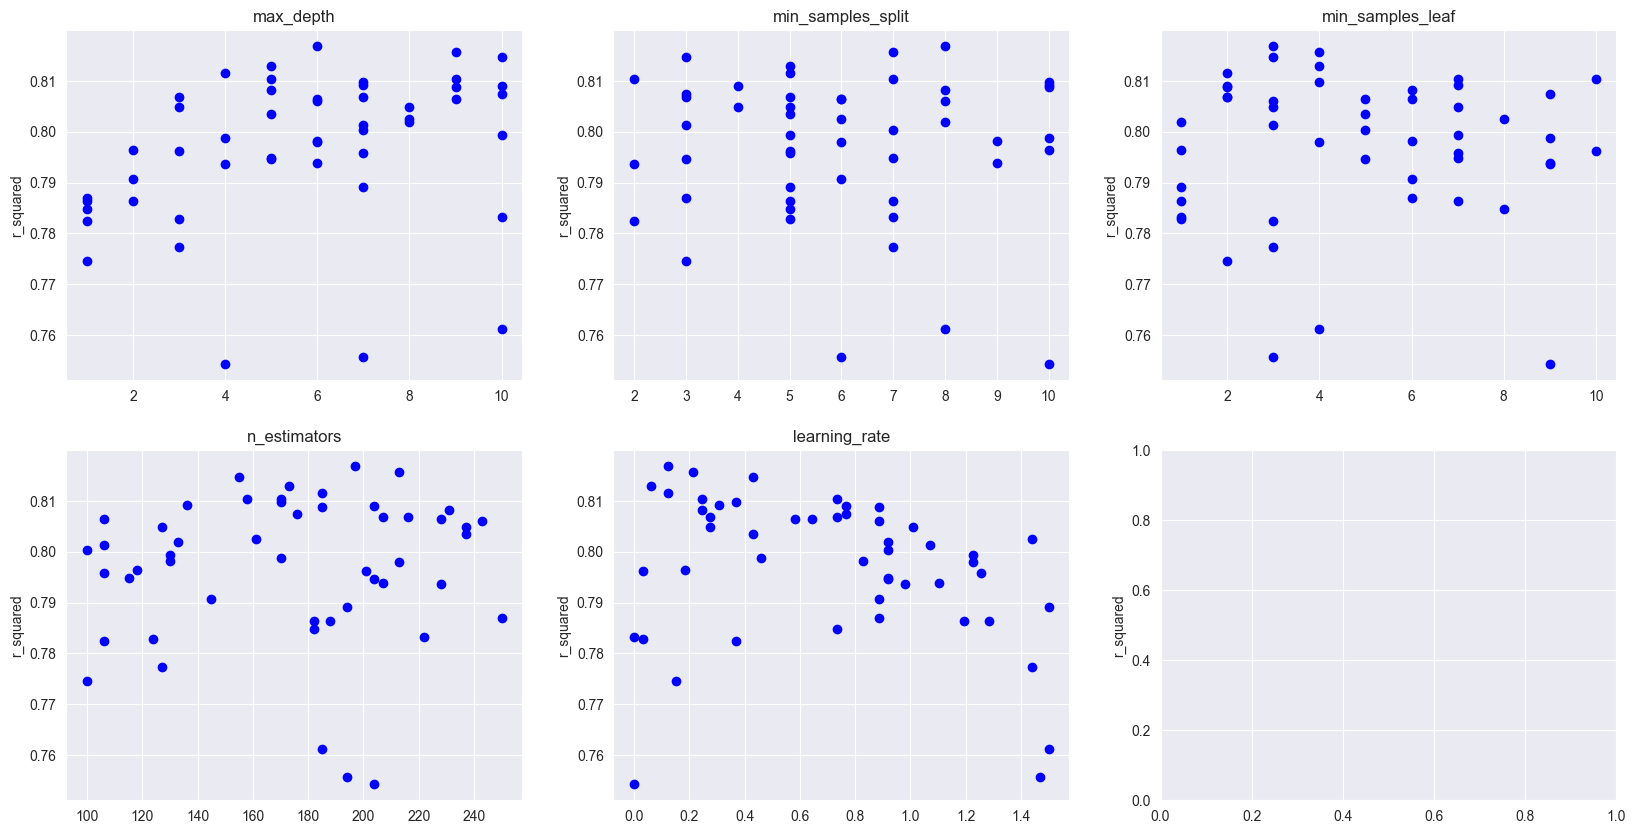

In [118]:
out2 = pd.DataFrame(gbm_random.cv_results_)

xlabel_names = ['param_max_depth','param_min_samples_split','param_min_samples_leaf','param_n_estimators',
                'param_learning_rate']

fig, axs = plt.subplots(2,3, figsize=(20,10))

axs[0,0].scatter(out2['param_max_depth'], out2['mean_test_score'], c='blue');
axs[0,0].set_title('max_depth')

axs[0,1].scatter(out2['param_min_samples_split'], out2['mean_test_score'], c='blue');
axs[0,1].set_title('min_samples_split')

axs[0,2].scatter(out2['param_min_samples_leaf'], out2['mean_test_score'], c='blue');
axs[0,2].set_title('min_samples_leaf')

axs[1,0].scatter(out2['param_n_estimators'], out2['mean_test_score'], c='blue');
axs[1,0].set_title('n_estimators')

axs[1,1].scatter(out2['param_learning_rate'], out2['mean_test_score'], c='blue');
axs[1,1].set_title('learning_rate')

for ax in axs.flat: ax.set(ylabel='r_squared')

4. Grid search and calibration

In [119]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV, calibration_curve

n_estimators = [int(x) for x in np.linspace(150, 160, num = 3)]
learning_rate = [x for x in np.linspace(0.1, 0.2, num = 3)]
max_depth = [10,11]
min_samples_split = [2,3]
min_samples_leaf = [3,10,11]

random_grid = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
gbm = GradientBoostingClassifier()
gbm_grid = GridSearchCV(estimator = gbm, param_grid = random_grid,  cv = 3, verbose=2,  n_jobs = -1)

isotonic_gbm = CalibratedClassifierCV(gbm_grid, cv=3, method='isotonic')
isotonic_gbm.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits
Fitting 3 folds for each of 108 candidates, totalling 324 fits


CalibratedClassifierCV(cv=3,
                       estimator=GridSearchCV(cv=3,
                                              estimator=GradientBoostingClassifier(),
                                              n_jobs=-1,
                                              param_grid={'learning_rate': [np.float64(0.1),
                                                                            np.float64(0.15000000000000002),
                                                                            np.float64(0.2)],
                                                          'max_depth': [10, 11],
                                                          'min_samples_leaf': [3,
                                                                               10,
                                                                               11],
                                                          'min_samples_split': [2,
                                                                                3],
                                                          'n_estimators': [150,
                                                                           155,
                                                                           160]},
                                              verbose=2),
                       method='isotonic')

5. evaluate

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       927
           1       0.82      0.73      0.77       673

    accuracy                           0.82      1600
   macro avg       0.82      0.81      0.81      1600
weighted avg       0.82      0.82      0.82      1600



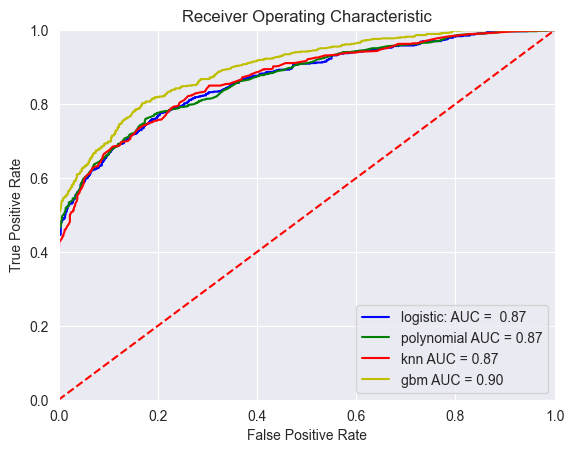

In [122]:
y_pred_gbm = isotonic_gbm.predict(X_val_stand)
print(classification_report(y_val, y_pred_gbm))

preds_gbm = isotonic_gbm.predict_proba(X_val_stand)[:,1]


fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
fpr_p, tpr_p, threshold = metrics.roc_curve(y_val, preds_poly)
fpr_k, tpr_k, threshold = metrics.roc_curve(y_val, preds_knn_b)
fpr_g, tpr_g, threshold = metrics.roc_curve(y_val, preds_gbm)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_p = metrics.auc(fpr_p, tpr_p)
roc_auc_k = metrics.auc(fpr_k, tpr_k)
roc_auc_g = metrics.auc(fpr_g, tpr_g)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'logistic: AUC =  %0.2f' % roc_auc)
plt.plot(fpr_p, tpr_p, 'g', label = 'polynomial AUC = %0.2f' % roc_auc_p)
plt.plot(fpr_k, tpr_k, 'r', label = 'knn AUC = %0.2f' % roc_auc_k)
plt.plot(fpr_g, tpr_g, 'y', label = 'gbm AUC = %0.2f' % roc_auc_g)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# 3. Support vector machines
1. Perform a Randomized search. Use the following parameters
    + C: 50 values between 0.001 and 5
    + kernel: 'linear', 'poly', 'rbf', 'sigmoid'
    + degree: 15 values between 1 and 15
    + gamma: 50 values between 0.001 and 50
    +  Use 3 folds and do 50 fits.
    + Use the balanced dataset
2. Evaluate the best model
3. Look at the scatterplots for the parameters
4. Do a grid search. Use the scatterplots to determine the parameters. Also perform the calibration at the same time.
5. Evaluate the best model model
    + Look at the classification report
    + Draw the ROC-curve (and include the previous ROC-curves)

1. Randomized search

In [120]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV

C = [round(x,5) for x in np.linspace(start = 0.001, stop = 5, num = 50)]
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
degree = [round(x) for x in np.linspace(start = 1, stop = 5, num = 15)]
gamma = [round(x,5) for x in np.linspace(start = 0.001, stop = 1, num = 50)]
#gamma = ['auto', 0.3,0.5, 0.7,0.9]

random_grid = {'C': C,
               'kernel': kernel,
               'degree':degree,
               'gamma': gamma}
svc = SVC()
svc_random = RandomizedSearchCV(estimator = svc, param_distributions = random_grid, n_iter =50, cv = 3, verbose=2, random_state=4872, n_jobs = -1)
svc_random.fit(X_train_smote, y_train_smote)

print(svc_random.best_params_)
params = svc_random.best_params_

Fitting 3 folds for each of 50 candidates, totalling 150 fits
{'kernel': 'rbf', 'gamma': np.float64(0.10294), 'degree': 4, 'C': np.float64(4.89798)}


2. Evaluate

In [123]:
from sklearn.metrics import classification_report

y_pred_svm = svc_random.predict(X_val_stand)
print(classification_report(y_val, y_pred_svm))

              precision    recall  f1-score   support

           0       0.84      0.83      0.83       927
           1       0.77      0.78      0.77       673

    accuracy                           0.81      1600
   macro avg       0.80      0.80      0.80      1600
weighted avg       0.81      0.81      0.81      1600



3. Scatter plots

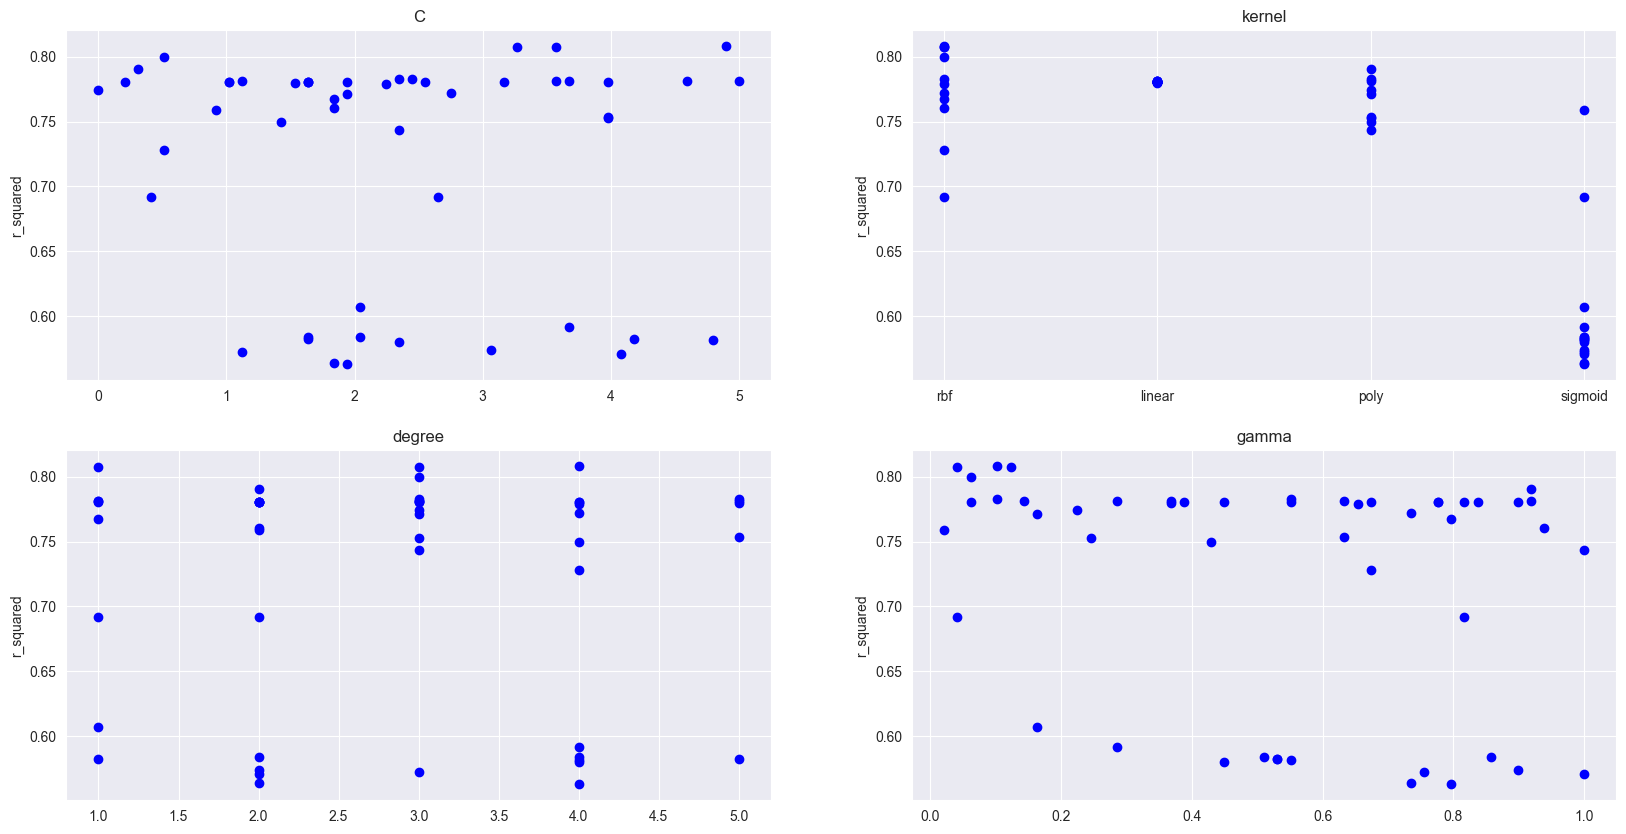

In [124]:
out2 = pd.DataFrame(svc_random.cv_results_)

xlabel_names = ['C',
                'kernel',
                'degree',
                'gamma']

fig, axs = plt.subplots(2,2, figsize=(20,10))

axs[0,0].scatter(out2['param_C'], out2['mean_test_score'], c='blue');
axs[0,0].set_title('C')

axs[0,1].scatter(out2['param_kernel'], out2['mean_test_score'], c='blue');
axs[0,1].set_title('kernel')

axs[1,0].scatter(out2['param_degree'], out2['mean_test_score'], c='blue');
axs[1,0].set_title('degree')

axs[1,1].scatter(out2['param_gamma'], out2['mean_test_score'], c='blue');
axs[1,1].set_title('gamma')

for ax in axs.flat: ax.set(ylabel='r_squared')

4. Grid search + calibration

In [125]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.calibration import CalibratedClassifierCV, calibration_curve


C = [round(x,5) for x in np.linspace(start = 3, stop = 3.5, num = 5)]
kernel = [ 'rbf']
degree = [3,4]
gamma = [round(x,5) for x in np.linspace(start = 0.02, stop = 0.08, num = 4)]
#gamma = ['auto', 0.3,0.5, 0.7,0.9]

random_grid = {'C': C,
               'kernel': kernel,
               'degree':degree,
               'gamma': gamma}
svc = SVC()
svc_grid = GridSearchCV(estimator = svc, param_grid = random_grid,  cv = 3, verbose=2,  n_jobs = -1)

isotonic_svm = CalibratedClassifierCV(svc_grid, cv=3, method='isotonic')
isotonic_svm.fit(X_train_smote, y_train_smote)


Fitting 3 folds for each of 40 candidates, totalling 120 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits
Fitting 3 folds for each of 40 candidates, totalling 120 fits


CalibratedClassifierCV(cv=3,
                       estimator=GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
                                              param_grid={'C': [np.float64(3.0),
                                                                np.float64(3.125),
                                                                np.float64(3.25),
                                                                np.float64(3.375),
                                                                np.float64(3.5)],
                                                          'degree': [3, 4],
                                                          'gamma': [np.float64(0.02),
                                                                    np.float64(0.04),
                                                                    np.float64(0.06),
                                                                    np.float64(0.08)],
                                                          'kernel': ['rbf']},
                                              verbose=2),
                       method='isotonic')

5. Evaluate

In [126]:
y_pred_svm = isotonic_svm.predict(X_val_stand)
print(classification_report(y_val, y_pred_svm))

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       927
           1       0.80      0.75      0.77       673

    accuracy                           0.82      1600
   macro avg       0.81      0.81      0.81      1600
weighted avg       0.81      0.82      0.81      1600



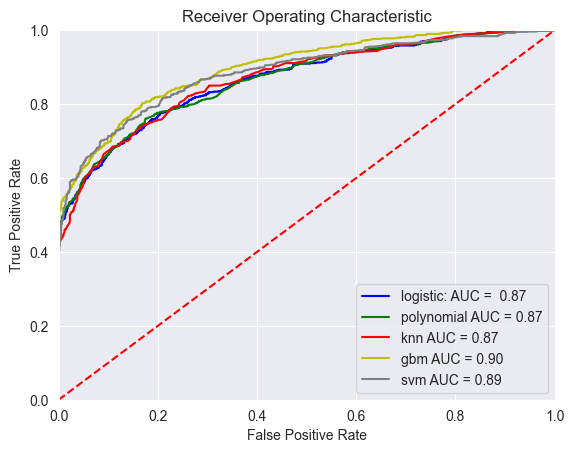

In [127]:
preds_svm = isotonic_svm.predict_proba(X_val_stand)[:,1]


fpr, tpr, threshold = metrics.roc_curve(y_val, preds)
fpr_p, tpr_p, threshold = metrics.roc_curve(y_val, preds_poly)
fpr_k, tpr_k, threshold = metrics.roc_curve(y_val, preds_knn_b)
fpr_g, tpr_g, threshold = metrics.roc_curve(y_val, preds_gbm)
fpr_s, tpr_s, threshold = metrics.roc_curve(y_val, preds_svm)

roc_auc = metrics.auc(fpr, tpr)
roc_auc_p = metrics.auc(fpr_p, tpr_p)
roc_auc_k = metrics.auc(fpr_k, tpr_k)
roc_auc_g = metrics.auc(fpr_g, tpr_g)
roc_auc_s = metrics.auc(fpr_s, tpr_s)


plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'logistic: AUC =  %0.2f' % roc_auc)
plt.plot(fpr_p, tpr_p, 'g', label = 'polynomial AUC = %0.2f' % roc_auc_p)
plt.plot(fpr_k, tpr_k, 'r', label = 'knn AUC = %0.2f' % roc_auc_k)
plt.plot(fpr_g, tpr_g, 'y', label = 'gbm AUC = %0.2f' % roc_auc_g)
plt.plot(fpr_s, tpr_s, 'grey', label = 'svm AUC = %0.2f' % roc_auc_s)

plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()